In [1]:
!jupyter nbconvert --to html mattias-1212.ipynb

[NbConvertApp] Converting notebook mattias-1212.ipynb to html
[NbConvertApp] Writing 450527 bytes to mattias-1212.html


In [1]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
import warnings
import itertools as IT
import glob
import datetime as dt
import time
import sys

import lightgbm as lgb
from scipy import stats

from dateutil.relativedelta import relativedelta

# from xgboost import plot_importance
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler


# #Common Model Algorithms
# from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
# import xgboost

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
pd.set_option('max_info_columns',500)
pd.set_option('display.float_format', lambda x : '%.3f' % x )

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


test= pd.read_csv("../input/fire-gimhae/PJT002_test.csv")
train = pd.read_csv("../input/fire-gimhae/PJT002_train.csv")
validation = pd.read_csv("../input/fire-gimhae/PJT002_validation.csv")

# 오브젝트 먼저 전처리

In [3]:
data=train.append(validation)

data.reset_index(inplace=True)

data.drop("index",axis=1,inplace=True)

In [4]:
data.iloc[:,2].dtype=='O'

object_list=[]
for col in data:
    if data[col].dtype =="object":
        object_list.append(col)
        
        
object_data=data[object_list[:]]


In [5]:
# 화재 발생 시기 데이터 타입 변경
object_data['dt_of_fr']=object_data['dt_of_fr'].astype('datetime64[ns]')

### bldng_us(사용용도)

In [6]:
object_data["High_Dng_lnd_us_YN"]=object_data.lnd_us_sttn_nm.apply(lambda x: 1 if x =="공업나지" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="공업용" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="공업나지" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="상업나지" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="상업용" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="아파트" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="업무용" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="상업기타" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="상업나지" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="상업용" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="아파트" else x)
object_data["High_Dng_lnd_us_YN"]=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x =="업무용" else x)
object_data['High_Dng_lnd_us_YN']=object_data.High_Dng_lnd_us_YN.apply(lambda x: 1 if x==1 else 0)

### bldng_archtctr(건물구조)

In [7]:
object_data['Dng_str_YN']=object_data.bldng_archtctr.apply(lambda x: 1 if x=="경량철골구조" else x)
object_data['Dng_str_YN']=object_data.Dng_str_YN.apply(lambda x: 1 if x=="일반철골구조" else x)
object_data['Dng_str_YN']=object_data.Dng_str_YN.apply(lambda x: 1 if x=="철근콘크리트구조" else x)
object_data['Dng_str_YN']=object_data.Dng_str_YN.apply(lambda x: 1 if x=="철골철근콘크리트구조" else x)
object_data['Dng_str_YN']=object_data.Dng_str_YN.apply(lambda x: 1 if x=="철골콘크리트구조" else x)
object_data['Dng_str_YN']=object_data.Dng_str_YN.apply(lambda x: 1 if x==1 else 0)

### us_yn(사용여부)

object_data['Use_T_YN']=object_data.us_yn.apply(lambda x: 1 if x=="T" else x)
object_data['Use_T_YN']=object_data.Use_T_YN.apply(lambda x: 0 if x=="Y" else x)
object_data['Use_T_YN']=object_data.Use_T_YN.apply(lambda x: 0 if x=="N" else x)


# 사용 용도에 따라 주거시설/편의시설 여부로 더미화

In [8]:
object_data['Dng_bldus_YN']=object_data.bldng_us.apply(lambda x: 1 if x=="단독주택" else x)
object_data['Dng_bldus_YN']=object_data.Dng_bldus_YN.apply(lambda x: 1 if x=="공동주택" else x)
object_data['Dng_bldus_YN']=object_data.Dng_bldus_YN.apply(lambda x: 1 if x=="공장" else x)
object_data['Dng_bldus_YN']=object_data.Dng_bldus_YN.apply(lambda x: 1 if x=="교육연구시설" else x)
object_data['Dng_bldus_YN']=object_data.Dng_bldus_YN.apply(lambda x: 1 if x=="숙박시설" else x)
object_data['Dng_bldus_YN']=object_data.Dng_bldus_YN.apply(lambda x: 1 if x=="위험물저장및처리시설" else x)
object_data['Dng_bldus_YN']=object_data.Dng_bldus_YN.apply(lambda x: 1 if x=="제1종근린생활시설" else x)
object_data['Dng_bldus_YN']=object_data.Dng_bldus_YN.apply(lambda x: 1 if x=="제2종근린생활시설" else x)
object_data['Dng_bldus_YN']=object_data.Dng_bldus_YN.apply(lambda x: 1 if x=="종교시설" else x)
object_data['Dng_bldus_YN']=object_data.Dng_bldus_YN.apply(lambda x: 1 if x==1 else 0)


### dt_of_athrztn(건물승인일자)

In [9]:
# 건축 날짜의 데이터 타입이 2종류, 따라서 이 모양을 연도 형식으로 바꾸어줄 필요가 있음.

object_data.dt_of_athrztn=object_data.dt_of_athrztn.apply(lambda x: str(x)[0:4] if len(str(x))==10 else x)
object_data.dt_of_athrztn=object_data.dt_of_athrztn.apply(lambda x: str(x)[0:4] if len(str(x))==8 else x)
object_data.dt_of_athrztn=object_data.dt_of_athrztn.apply(lambda x: str(x)[0:4] if len(str(x))==6 else x)

dirty_date_idx=object_data.dt_of_athrztn[object_data.dt_of_athrztn.astype(str).apply(len)>4].index

In [10]:
object_data.dt_of_athrztn[dirty_date_idx[0]]="1980"
object_data.dt_of_athrztn[dirty_date_idx[1]]="1890"
object_data.dt_of_athrztn[dirty_date_idx[2]]="1890"
object_data.dt_of_athrztn[dirty_date_idx[3]]="1990"
object_data.dt_of_athrztn[dirty_date_idx[4]]="1990"
object_data.dt_of_athrztn[dirty_date_idx[5]]="1982"
object_data.dt_of_athrztn[dirty_date_idx[6]]="1978"
object_data.dt_of_athrztn[dirty_date_idx[7]]="1994"

In [11]:
#결측치가 아닌 연도 데이터를 시각화 하는 코드

#sns.distplot(object_data.dt_of_athrztn[~(object_data.dt_of_athrztn.isna)()].astype(int))

말도안돼_연도=object_data.dt_of_athrztn[~(object_data.dt_of_athrztn.isna)()].astype(int)[object_data.dt_of_athrztn[~(object_data.dt_of_athrztn.isna)()].astype(int)>2019].index

In [12]:
object_data.dt_of_athrztn.iloc[말도안돼_연도]="1997"

In [13]:
있는_연도=object_data.dt_of_athrztn[~(object_data.dt_of_athrztn.isna())].astype(int)

In [14]:
object_data

,bldng_archtctr,bldng_us,bldng_us_clssfctn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,dngrs_thng_yn,dt_of_athrztn,dt_of_fr,emd_nm,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,fr_yn,jmk,lnd_us_sttn_nm,mlt_us_yn,rd_sd_nm,rgnl_ar_nm,rgnl_ar_nm2,slf_fr_brgd_yn,trgt_crtr,us_yn,High_Dng_lnd_us_YN,Dng_str_YN,Dng_bldus_YN
0,블록구조,단독주택,주거용,NaN,NaN,NaN,1977,2017-10-20 05:54:00,경상남도 창녕군 창녕읍,NaN,NaN,Y,대,단독,N,세로한면(불),자연녹지지역,지정되지않음,NaN,NaN,NaN,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-30 08:26:00,경상남도 의령군 가례면,NaN,NaN,N,대,단독,N,세로한면(가),계획관리지역,지정되지않음,NaN,NaN,NaN,0,0,0
2,철근콘크리트구조,공동주택,주거용,NaN,NaN,NaN,2000,2016-10-30 14:57:00,경상남도 창녕군 창녕읍,NaN,NaN,Y,답,연립,N,중로한면,제2종일반주거지역,지정되지않음,NaN,NaN,NaN,0,1,1
3,일반목구조,단독주택,주거용,NaN,NaN,NaN,1936,2016-06-14 05:23:00,경상남도 창원시의창구 대산면,NaN,NaN,N,대,단독,N,세로한면(불),제1종일반주거지역,지정되지않음,NaN,NaN,NaN,0,0,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-22 05:38:00,경상남도 창녕군 창녕읍,NaN,NaN,N,임,자연림,N,세로한면(불),자연환경보전지역,지정되지않음,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-09 17:00:00,경상남도 김해시 칠산서부동,NaN,NaN,N,대,단독,N,세로한면(불),제2종일반주거지역,지정되지않음,NaN,NaN,NaN,0,0,0
66093,철근콘크리트구조,제2종근린생활시설,상업용,N,N,N,2007,2014-03-25 16:52:00,경상남도 김해시 삼안동,N,N,N,대,상업용,N,세로한면(가),자연녹지지역,지정되지않음,N,일반대상물,Y,1,1,1
66094,일반철골구조,제2종근린생활시설,상업용,N,N,N,2000,2017-07-07 14:12:00,경상남도 김해시 진영읍,N,N,Y,대,공업용,N,중로한면,자연녹지지역,준공업지역,N,일반대상물,Y,1,1,1
66095,철근콘크리트구조,단독주택,주거용,NaN,NaN,NaN,1993,2018-12-09 08:13:00,경상남도 김해시 내외동,NaN,NaN,N,대,주상용,N,중로한면,제1종일반주거지역,지정되지않음,NaN,NaN,NaN,0,1,1


In [15]:
not_na_idx=object_data.dt_of_athrztn[object_data.dt_of_athrztn.notnull()].index

In [16]:
object_data.dt_of_athrztn[not_na_idx].isna().sum()

0

In [17]:
# object_data.dt_of_athrztn.fillna("1988",inplace=True)

object_data.dt_of_athrztn[not_na_idx]=object_data.dt_of_athrztn[not_na_idx].astype(int)

In [18]:
object_data["Bldng_Age"]=object_data.dt_of_athrztn.apply(lambda x: 2019-x)

### rd_sd_nm(도로측면명)

In [19]:
object_data['Dng_rd_YN']=object_data.rd_sd_nm.apply(lambda x: 1 if x=="광대로한면" else x)
object_data['Dng_rd_YN']=object_data.Dng_rd_YN.apply(lambda x: 1 if x=="광대소각" else x)
object_data['Dng_rd_YN']=object_data.Dng_rd_YN.apply(lambda x: 1 if x=="중로각지" else x)
object_data['Dng_rd_YN']=object_data.Dng_rd_YN.apply(lambda x: 1 if x=="중로한면" else x)
object_data['Dng_rd_YN']=object_data.Dng_rd_YN.apply(lambda x: 1 if x==1 else 0)


# 목표변수 변환

In [20]:
object_data['target_value']=object_data.fr_yn.apply(lambda x: 1 if x=="Y" else 0)

### emd_nm(행정구역 명)

In [21]:
object_data.emd_nm=object_data.emd_nm.str[4:]


지명=object_data.emd_nm[object_data.emd_nm.notnull()].reset_index()
지명.drop('index',inplace=True,axis=1)

In [22]:
object_data["Gimhae_YN"]=지명.emd_nm.apply(lambda x: "1" if x[1:4]=="김해시" else "0")

In [23]:
object_data["Gimhae_YN"].fillna(1,inplace=True)

In [24]:
object_data["Gimhae_YN"]=object_data["Gimhae_YN"].astype(int)

# object_data.groupby("emd_nm").size().sort_values(ascending=False).sample(100)

In [25]:
object_data

,bldng_archtctr,bldng_us,bldng_us_clssfctn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,dngrs_thng_yn,dt_of_athrztn,dt_of_fr,emd_nm,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,fr_yn,jmk,lnd_us_sttn_nm,mlt_us_yn,rd_sd_nm,rgnl_ar_nm,rgnl_ar_nm2,slf_fr_brgd_yn,trgt_crtr,us_yn,High_Dng_lnd_us_YN,Dng_str_YN,Dng_bldus_YN,Bldng_Age,Dng_rd_YN,target_value,Gimhae_YN
0,블록구조,단독주택,주거용,NaN,NaN,NaN,1977,2017-10-20 05:54:00,창녕군 창녕읍,NaN,NaN,Y,대,단독,N,세로한면(불),자연녹지지역,지정되지않음,NaN,NaN,NaN,0,0,1,42.000,0,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-30 08:26:00,의령군 가례면,NaN,NaN,N,대,단독,N,세로한면(가),계획관리지역,지정되지않음,NaN,NaN,NaN,0,0,0,nan,0,0,0
2,철근콘크리트구조,공동주택,주거용,NaN,NaN,NaN,2000,2016-10-30 14:57:00,창녕군 창녕읍,NaN,NaN,Y,답,연립,N,중로한면,제2종일반주거지역,지정되지않음,NaN,NaN,NaN,0,1,1,19.000,1,1,0
3,일반목구조,단독주택,주거용,NaN,NaN,NaN,1936,2016-06-14 05:23:00,창원시의창구 대산면,NaN,NaN,N,대,단독,N,세로한면(불),제1종일반주거지역,지정되지않음,NaN,NaN,NaN,0,0,1,83.000,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-22 05:38:00,창녕군 창녕읍,NaN,NaN,N,임,자연림,N,세로한면(불),자연환경보전지역,지정되지않음,NaN,NaN,NaN,0,0,0,nan,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-09 17:00:00,김해시 칠산서부동,NaN,NaN,N,대,단독,N,세로한면(불),제2종일반주거지역,지정되지않음,NaN,NaN,NaN,0,0,0,nan,0,0,1
66093,철근콘크리트구조,제2종근린생활시설,상업용,N,N,N,2007,2014-03-25 16:52:00,김해시 삼안동,N,N,N,대,상업용,N,세로한면(가),자연녹지지역,지정되지않음,N,일반대상물,Y,1,1,1,12.000,0,0,1
66094,일반철골구조,제2종근린생활시설,상업용,N,N,N,2000,2017-07-07 14:12:00,김해시 진영읍,N,N,Y,대,공업용,N,중로한면,자연녹지지역,준공업지역,N,일반대상물,Y,1,1,1,19.000,1,1,1
66095,철근콘크리트구조,단독주택,주거용,NaN,NaN,NaN,1993,2018-12-09 08:13:00,김해시 내외동,NaN,NaN,N,대,주상용,N,중로한면,제1종일반주거지역,지정되지않음,NaN,NaN,NaN,0,1,1,26.000,1,0,1


# 수치형 데이터

In [26]:
# 수치형 데이터 따로 정리
numeric_list=list(set(data.columns.tolist()) - set(object_list))
numeric_list=sorted(numeric_list)
numeric_data=data[numeric_list[:]]

In [27]:
numeric_list_not_engry=[s for s in numeric_list if not "engry" in s]

numeric_data_on=numeric_data.loc[:,numeric_list_not_engry]
# numeric_data_on=numeric_data_on.join(object_data.Bldng_Age)

numeric_data_on.describe()

,ahsm_dstnc,bldng_ar,bldng_ar_prc,bldng_cnt,bldng_cnt_in_50m,cctv_dstnc,cctv_in_100m,fr_mn_cnt,fr_sttn_dstnc,fr_wthr_fclt_dstnc,fr_wthr_fclt_in_100m,hm_cnt,hmdt,id,lnd_ar,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,no_tbc_zn_dstnc,prcpttn,sft_emrgnc_bll_dstnc,tbc_rtl_str_dstnc,tmprtr,ttl_ar,ttl_dwn_flr,ttl_grnd_flr,wnd_drctn,wnd_spd
count,66097.000,66097.000,41116.000,66097.000,66097.000,66097.000,66097.000,66055.000,66097.000,66097.000,66097.000,65395.000,66072.000,66097.000,66097.000,403.000,392.000,398.000,399.000,393.000,384.000,401.000,382.000,374.000,374.000,397.000,397.000,393.000,392.000,66097.000,6116.000,66097.000,66097.000,66083.000,66097.000,54167.000,55092.000,65864.000,66060.000
mean,9559.646,709.930,684209.251,3.327,3.808,709.724,0.408,155.291,5375.582,1735.017,0.259,12916.961,65.416,103580.977,27084.946,3.464,3.139,3.496,3.416,3.221,1.726,3.671,1.800,0.596,0.572,2.947,2.947,2.801,2.819,1111.026,1.756,28356.010,3020.091,14.126,3234.041,0.141,3.587,166.673,1.601
std,11114.215,9412.104,529423.577,6.920,8.219,1277.601,1.133,36.965,4786.232,2550.972,0.611,16169.107,23.495,19930.057,2043907.270,0.580,1.250,0.756,1.009,1.199,1.618,0.683,1.785,1.272,1.223,1.146,1.146,1.465,1.456,1606.611,4.063,24630.329,3245.028,9.738,82736.129,1.013,18.599,125.793,1.334
min,0.000,0.000,17537.000,1.000,0.000,0.000,0.000,85.000,3.000,0.000,0.000,778.000,0.000,69055.000,0.000,1.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,-14.100,0.000,0.000,0.000,0.000,0.000
25%,939.000,49.590,297495.250,1.000,0.000,97.000,0.000,118.000,1565.000,103.000,0.000,3170.000,48.000,86320.000,0.000,3.000,3.000,3.000,3.000,3.000,0.000,3.409,0.000,0.000,0.000,3.000,3.000,2.581,2.484,126.000,0.000,8321.000,459.000,6.300,54.210,0.000,1.000,50.000,0.600
50%,4345.000,93.140,597564.000,2.000,0.000,263.000,0.000,164.000,3866.000,475.000,0.000,6036.000,68.000,103593.000,186.100,3.500,3.500,4.000,4.000,3.500,1.875,4.000,2.290,0.000,0.000,3.000,3.000,3.000,3.000,422.000,0.500,23015.000,1874.000,14.800,101.490,0.000,1.000,180.000,1.300
75%,15881.000,170.860,915874.250,4.000,3.000,817.000,0.000,178.000,7990.000,2119.000,0.000,14667.000,86.000,120842.000,484.000,4.000,4.000,4.000,4.000,4.000,3.000,4.000,3.500,0.000,0.000,3.619,3.619,4.000,4.000,1447.000,1.500,41688.000,4610.000,22.000,261.400,0.000,2.000,290.000,2.300
max,56485.000,572897.955,15689300.000,705.000,84.000,12278.000,24.000,210.000,38044.000,17716.000,10.000,115081.000,100.000,138108.000,203898366.000,5.000,5.000,6.000,5.500,5.000,5.000,5.000,5.000,4.000,4.000,5.000,5.000,5.000,5.000,16164.000,93.000,103571.000,23228.000,38.100,12351844.468,60.000,594.000,360.000,15.300


In [28]:
DF=object_data.join(numeric_data_on)

DF.columns

data=DF.drop(["dt_of_fr","fr_yn","bldng_us","bldng_archtctr","dt_of_athrztn","bldng_us_clssfctn","jmk","rgnl_ar_nm","rgnl_ar_nm2","lnd_us_sttn_nm","rd_sd_nm","emd_nm","mlt_us_yn",\
             "trgt_crtr","fr_fghtng_fclt_spcl_css_5_yn","fr_fghtng_fclt_spcl_css_6_yn","us_yn","dngrs_thng_yn","slf_fr_brgd_yn","blk_dngrs_thng_mnfctr_yn","cltrl_hrtg_yn"],axis=1)

data.fillna(0,inplace=True)

In [29]:
DF1=DF.drop(["dt_of_fr","fr_yn","bldng_us","bldng_archtctr","dt_of_athrztn","bldng_us_clssfctn","jmk","rgnl_ar_nm","rgnl_ar_nm2","lnd_us_sttn_nm","rd_sd_nm","emd_nm","mlt_us_yn",\
             "trgt_crtr","fr_fghtng_fclt_spcl_css_5_yn","fr_fghtng_fclt_spcl_css_6_yn","us_yn","dngrs_thng_yn","slf_fr_brgd_yn","blk_dngrs_thng_mnfctr_yn","cltrl_hrtg_yn"],axis=1)

In [30]:
data_index=data["id"]

data=data.set_index("id")

# 스케일링 후 다시 칼럼 네임 붙이기
colnames=data.columns

transformer = RobustScaler().fit(data)
data=transformer.transform(data)

In [31]:
data=pd.DataFrame(data)

data.columns=colnames

print('NON FIRE', round(data['target_value'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('FIRE', round(data['target_value'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

X = data.drop('target_value', axis=1)
y = data['target_value']

NON FIRE 86.49 % of the dataset
FIRE 13.51 % of the dataset


# Feature Selection

[3.34826082e-02 5.62683677e-02 6.27098609e-02 5.45154555e-02
 1.13984954e-02 1.01582261e-02 3.81562376e-02 4.58193645e-02
 2.91055240e-02 3.36304438e-02 2.45735170e-02 3.18589417e-02
 1.57153239e-02 2.87390733e-02 3.42459373e-02 4.91331019e-02
 1.50503542e-02 3.46264216e-02 5.02460315e-02 3.57143652e-02
 4.71835188e-04 9.77988127e-04 3.07161742e-03 3.44371103e-04
 4.59365035e-04 2.79204760e-04 2.46349524e-04 2.12824692e-04
 1.33777763e-04 6.14892662e-05 5.46580628e-04 2.66323287e-04
 1.70321222e-03 2.91694275e-04 3.25532336e-02 7.34084608e-03
 3.65122625e-02 3.28935149e-02 3.47519438e-02 4.27090221e-02
 9.60267504e-03 3.17891453e-02 3.17336831e-02 3.58993889e-02]


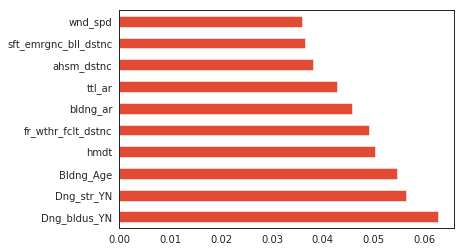

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

feat_importances.sort_values(ascending=False)

중요_변수_리스트=feat_importances[feat_importances>0.0015].index.tolist()

중요_변수_리스트.append("target_value")
# 중요_변수_리스트.append("Use_T_YN")
data=DF[중요_변수_리스트]

In [33]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=4, initial_strategy='median')

imp.fit(DF1)
imputed_data = pd.DataFrame(data=imp.transform(DF1), 
                             columns=DF1.columns.tolist(),
                             dtype='int')

In [34]:
data=imputed_data

In [35]:
# 스케일링 후 다시 칼럼 네임 붙이기
colnames=data.columns

transformer = RobustScaler().fit(data)
data=transformer.transform(data)

In [36]:
data=pd.DataFrame(data)

data.columns=colnames

print('NON FIRE', round(data['target_value'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('FIRE', round(data['target_value'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

X = data.drop('target_value', axis=1)
y = data['target_value']

# 타겟의 샘플 수
target_sample=data.groupby('target_value').count().iloc[1,1]
print(target_sample,"and",data.groupby('target_value').count().iloc[0,1])

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))




NON FIRE 86.49 % of the dataset
FIRE 13.51 % of the dataset
8929 and 57168
Train: [12994 12995 12996 ... 66094 66095 66096] Test: [    0     1     2 ... 15840 15862 15873]
Train: [    0     1     2 ... 66094 66095 66096] Test: [12994 12995 12996 ... 31569 31594 31595]
Train: [    0     1     2 ... 66094 66095 66096] Test: [25773 25774 25775 ... 46813 46832 46848]
Train: [    0     1     2 ... 66094 66095 66096] Test: [38635 38636 38637 ... 56622 56624 56626]
Train: [    0     1     2 ... 56622 56624 56626] Test: [51906 51907 51908 ... 66094 66095 66096]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.86489911 0.13510089]
[0.86495688 0.13504312]


## SMOTE

In [37]:
X_resample,y_resample=SMOTE().fit_sample(X,y.values.ravel())

y_resample=pd.DataFrame(y_resample)

X_resample=pd.DataFrame(X_resample)

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=0)

[1]	valid_0's binary_error: 0.157284	valid_0's f1: 0.840926
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_error: 0.147897	valid_0's f1: 0.851009
[3]	valid_0's binary_error: 0.133874	valid_0's f1: 0.869122
[4]	valid_0's binary_error: 0.130404	valid_0's f1: 0.873505
[5]	valid_0's binary_error: 0.125915	valid_0's f1: 0.877228
[6]	valid_0's binary_error: 0.122795	valid_0's f1: 0.879506
[7]	valid_0's binary_error: 0.119443	valid_0's f1: 0.883266
[8]	valid_0's binary_error: 0.117577	valid_0's f1: 0.884358
[9]	valid_0's binary_error: 0.116615	valid_0's f1: 0.885994
[10]	valid_0's binary_error: 0.113	valid_0's f1: 0.888678
[11]	valid_0's binary_error: 0.11093	valid_0's f1: 0.89062
[12]	valid_0's binary_error: 0.108452	valid_0's f1: 0.892665
[13]	valid_0's binary_error: 0.10749	valid_0's f1: 0.893707
[14]	valid_0's binary_error: 0.105828	valid_0's f1: 0.894783
[15]	valid_0's binary_error: 0.103029	valid_0's f1: 0.897154
[16]	valid_0's binary_error: 0.102154	va

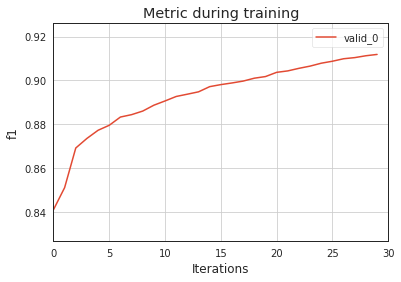

In [38]:
# from sklearn.metrics import f1_score

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

evals_result = {}

params = {
        'task': 'train',
        'objective': 'binary',    # 2値分類の指定
        'metric': 'binary_error', # 誤答率の割合
        'verbose': 1
}

clf = lgb.train(params,
                lgb_train,
                num_boost_round=30,
                valid_sets=lgb_eval,
                feval=lgb_f1_score,
                evals_result=evals_result,
                early_stopping_rounds=5)

# clf = lgb.train(params, train_data, valid_sets=[val_data, train_data], valid_names=['val', 'train'], feval=lgb_f1_score, evals_result=evals_result)

lgb.plot_metric(evals_result, metric='f1')

In [39]:
예측 = clf.predict(original_Xtest, num_iteration=clf.best_iteration)
예측[예측>0.5]=1
예측[예측<=0.5]=0

정답=original_ytest



# 성능평가

[[10045  1388]
 [  602  1183]]


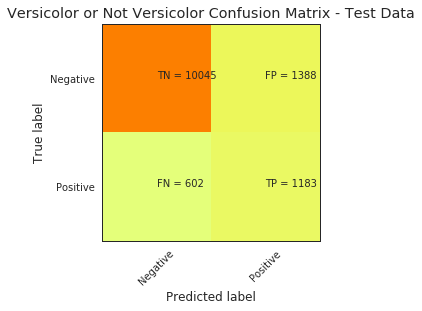

0.6627450980392157
0.4601322442629327
0.8494477228022393
####################################################
이게중요! 0.5431588613406795
####################################################
(array([0.13504312, 0.46013224, 1.        ]), array([1.       , 0.6627451, 0.       ]), array([0., 1.]))


In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(정답, 예측)
print(cm)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

import sklearn.metrics

print(sklearn.metrics.recall_score(정답,예측))
print(sklearn.metrics.precision_score(정답,예측))
print(sklearn.metrics.accuracy_score(정답,예측))
print("####################################################")

print("이게중요!",sklearn.metrics.f1_score(정답,예측))

print("####################################################")

print(sklearn.metrics.precision_recall_curve(정답,예측))